In [151]:
#from google.colab import drive
#drive.mount('/content/drive')

In [152]:
#cd /content/drive/MyDrive/Colab\ Notebooks/house-prices-advanced-regression-techniques

# Exploratory Data Analysis

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df_train = pd.read_csv("data/filled_missing_train.csv")
df_test = pd.read_csv("data/filled_missing_test.csv")

In [155]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200

###  One time call functions

In [156]:
def comparison_plot(feature,df=df_train,box=False):
    plt.figure(figsize=(9,4),dpi=150)

    plt.subplot(1,2,1)
    if box:
        sns.histplot(df[feature],bins=20,color='#006699')
        plt.title("Hist Plot of "+feature)
    else:
        sns.kdeplot(x=df[feature],shade=True)
        plt.title("KDF Plot")
    plt.subplot(1,2,2)
    if box:
        sns.boxplot(x=df[feature],y=df['SalePrice'])
        plt.title(feature+" vs SalePrice")
    else:
        sns.scatterplot(x=df[feature],y=df['SalePrice'], alpha=0.5)
        plt.title(feature+" vs SalePrice")
    plt.tight_layout()

In [157]:
def get_feature_description(feature):
    with open("data/data_description.txt", mode='r') as des:
        i=0
        for line in des:
            if feature in line:
                print(line)
                i = 1
            elif ("\t" in line) and (i==1):
                print(line)
            elif (":" in line) & (i==1):
                break

In [158]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1453 non-null   int64  
 1   MSSubClass     1453 non-null   int64  
 2   MSZoning       1453 non-null   object 
 3   LotFrontage    1453 non-null   float64
 4   LotArea        1453 non-null   int64  
 5   Street         1453 non-null   object 
 6   Alley          1453 non-null   object 
 7   LotShape       1453 non-null   object 
 8   LandContour    1453 non-null   object 
 9   Utilities      1453 non-null   object 
 10  LotConfig      1453 non-null   object 
 11  LandSlope      1453 non-null   object 
 12  Neighborhood   1453 non-null   object 
 13  Condition1     1453 non-null   object 
 14  Condition2     1453 non-null   object 
 15  BldgType       1453 non-null   object 
 16  HouseStyle     1453 non-null   object 
 17  OverallQual    1453 non-null   int64  
 18  OverallC

## Numerical Features

- first of all let's try to do some analysis on the Numerical features, based on their correlation with SalePrice

In [159]:
ind = df_train.corr()['SalePrice'].sort_values(ascending=False).index
val = df_train.corr()['SalePrice'].sort_values(ascending=False).values

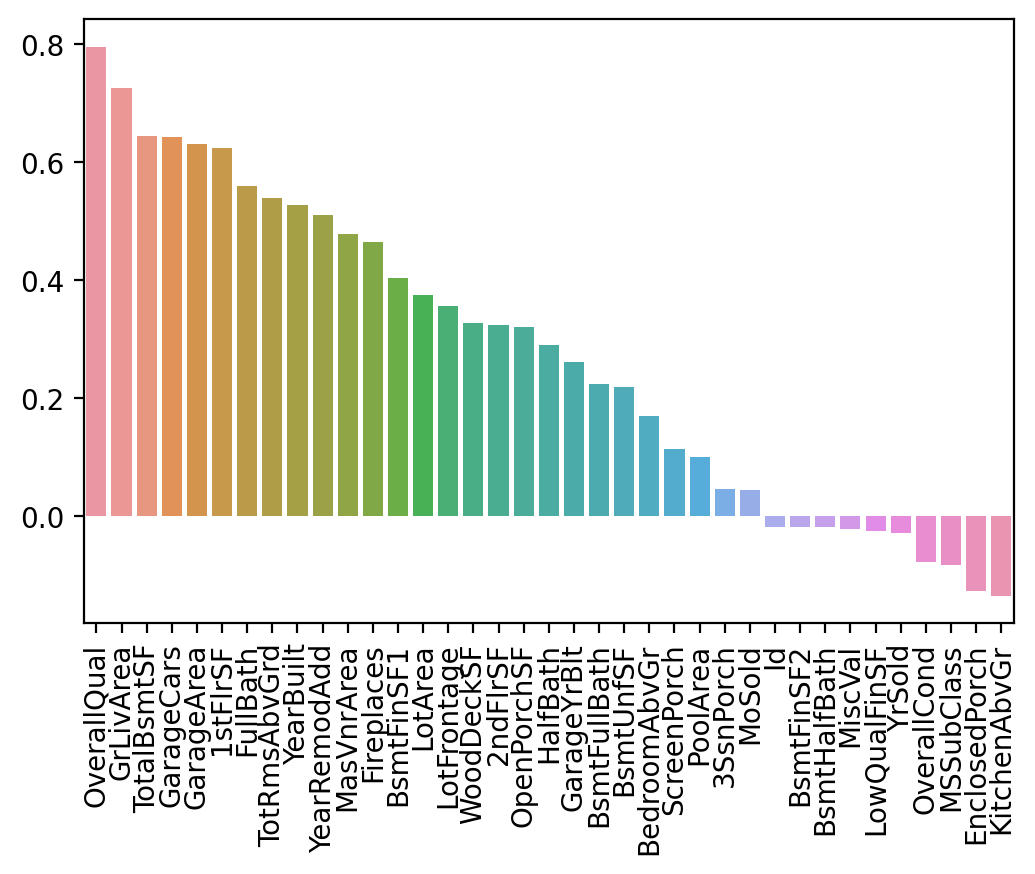

In [160]:
sns.barplot(x = ind[1:], y = val[1:])
plt.xticks(rotation=90);

- from above we can see thatt there are many features that are Strongle correlated with SalePrice and few of them are negatively correlated, so we can try to do some analysis on them

### OverallQual

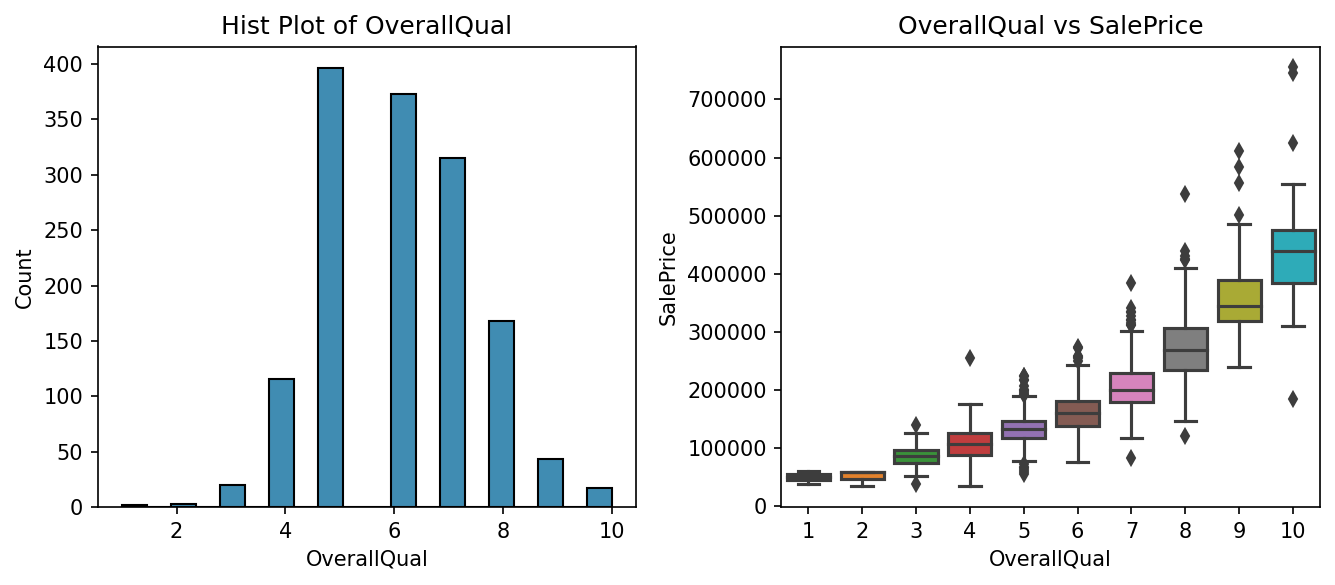

In [161]:
comparison_plot("OverallQual",box=True)

- from above we can clearly see that as the OverallQual increases, the SalePrice also increases,
- maximum Houses have OverallQual around 5, 6 or 7

- there are few outliners too we should remove them as they are not representative of the rest of the data
- the outliers are the ones with OverallQual 4 whose Sale Price is around 250000 which is high compared to the rest of the data and the one whose OverallQual is 7,8 and 10 but their SalePrice is much lesser than the rest of the data

In [162]:
ind = df_train[ ((df_train['OverallQual']==10) & (df_train['SalePrice']<300000)) | ((df_train['OverallQual']==8) & (df_train['SalePrice']<150000))  | ((df_train['OverallQual']==7) & (df_train['SalePrice']<100000)) | ((df_train['OverallQual']==4) & (df_train['SalePrice']>200000)) ].index
df_train.loc[ind]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
453,458,20,RL,73.0,53227,Pave,None,IR1,Low,AllPub,...,0,None,None,None,0,3,2008,WD,Normal,256000
519,524,60,RL,130.0,40094,Pave,None,IR1,Bnk,AllPub,...,0,None,None,None,0,10,2007,New,Partial,184750
628,633,20,RL,85.0,11900,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2009,WD,Family,82500
1317,1325,20,RL,75.0,9986,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2007,New,Partial,147000
1342,1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,122000


In [163]:
df_train.drop(ind,inplace=True)

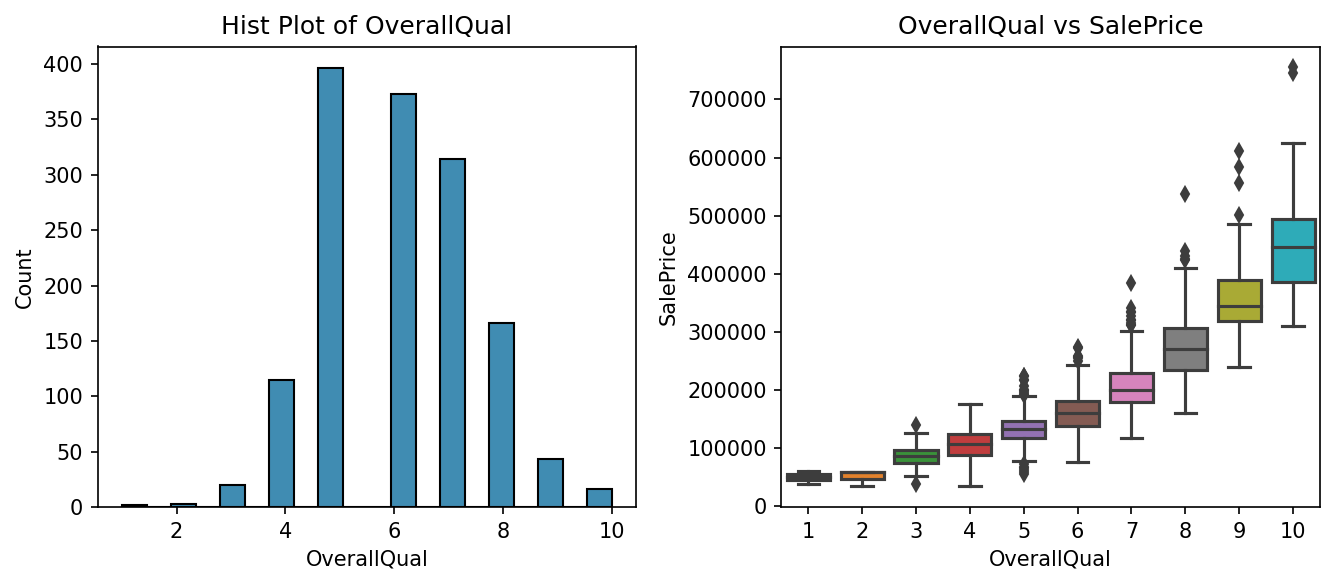

In [164]:
comparison_plot("OverallQual",box=True)

- outliners are removed

### GrLivArea

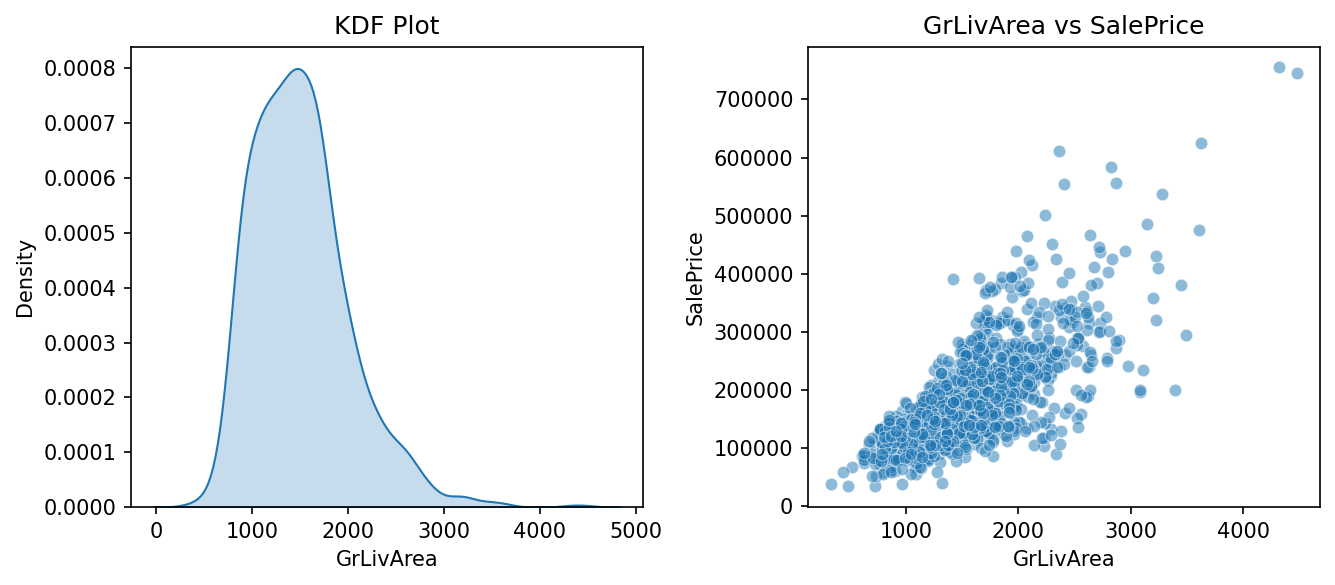

In [165]:
comparison_plot("GrLivArea")

- from the above we can clearly see that as the GrLivArea increases, the SalePrice also increases, this is a linear relation

### TotalBsmtSF

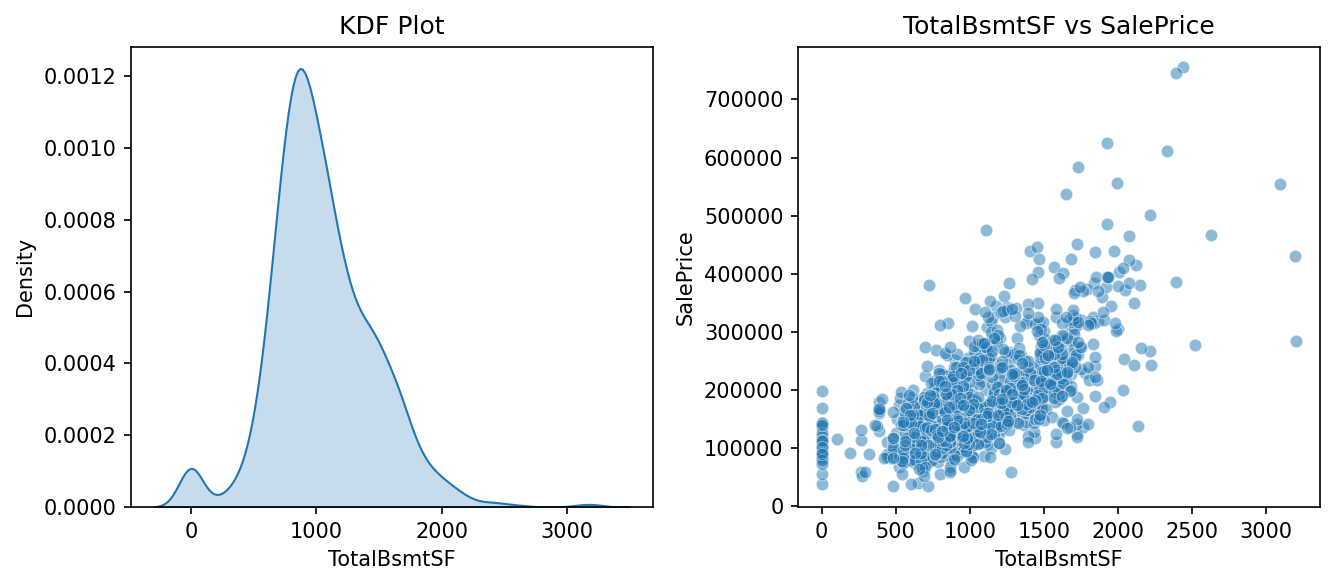

In [166]:
comparison_plot("TotalBsmtSF")

- from above we can clearly see that as the TotalBsmtSF increases, the SalePrice also increases
- but in case of no basements==> we can easily see that there is a variance in the SalePrice  from around 0 to 200000

### GarageCars

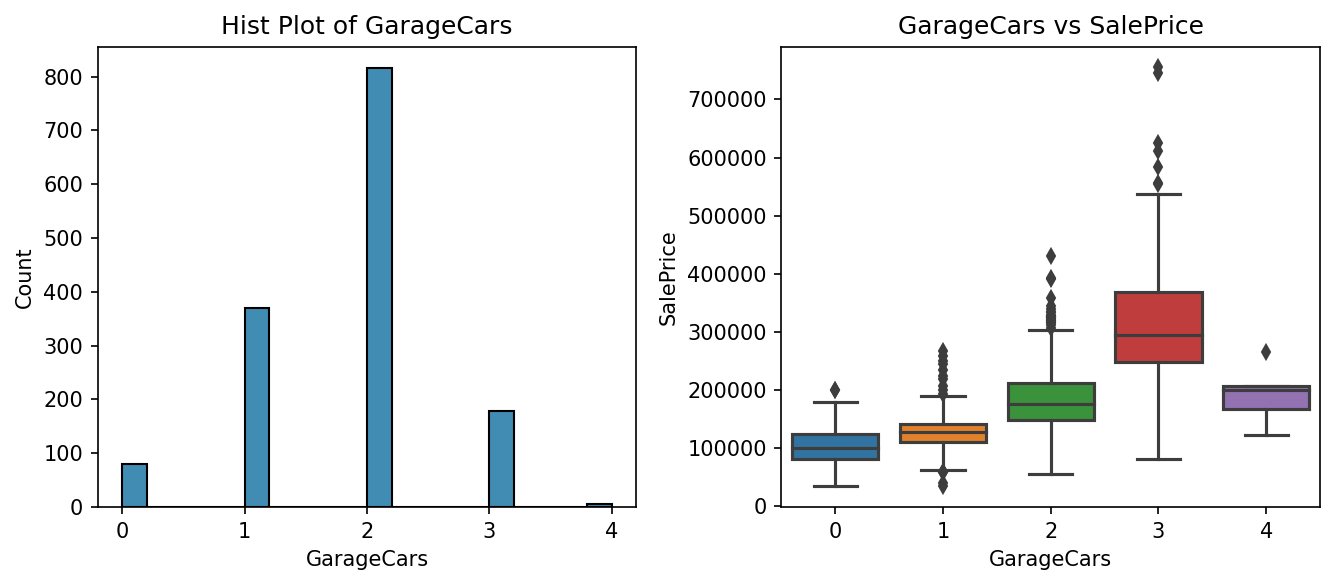

In [167]:
comparison_plot("GarageCars",box=True)

- we will not consider the GarageCars=4 as outliners as it is a general trend
- from above we can see that as the GarageCars increases, the SalePrice also increases, but after a certain point, the price starts to go down again, which is obvious because 3 Cars Capacity Garage is more than sufficient 
- Most of the houses have GarageCars=2 but the Price of those whith GarageCars=4 is higher

### GarageArea

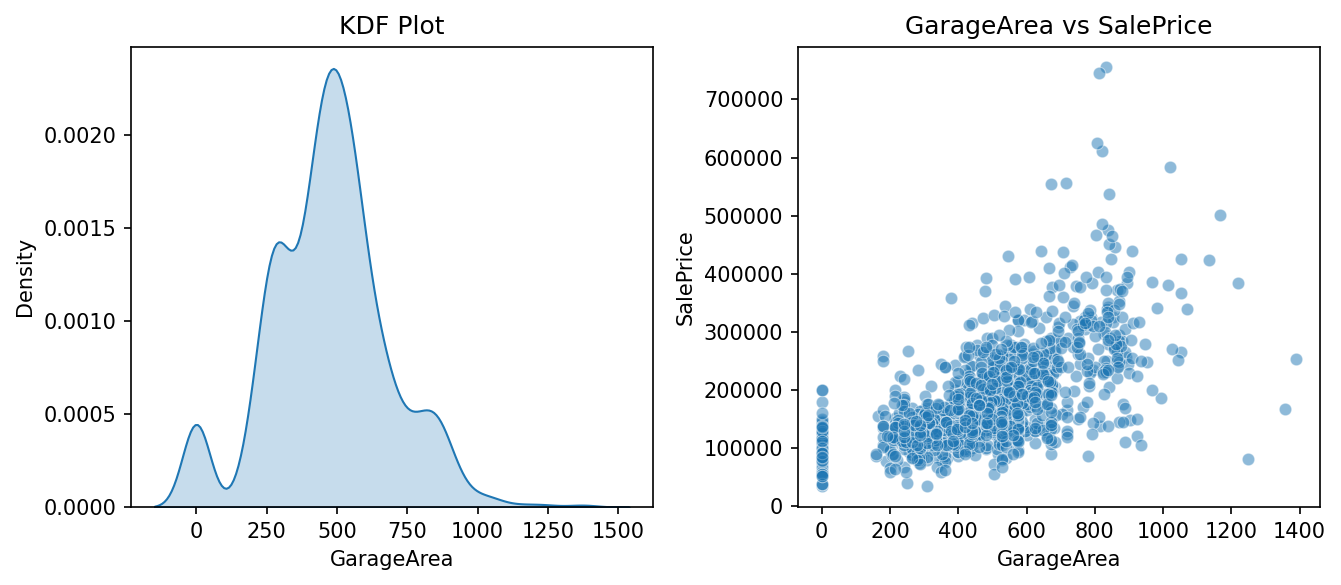

In [168]:
comparison_plot("GarageArea")

- this also look like a kind of linear relation, except the case where there is no garage
- Most of the houses have the GarageArea around 500

### 1stFlrSF

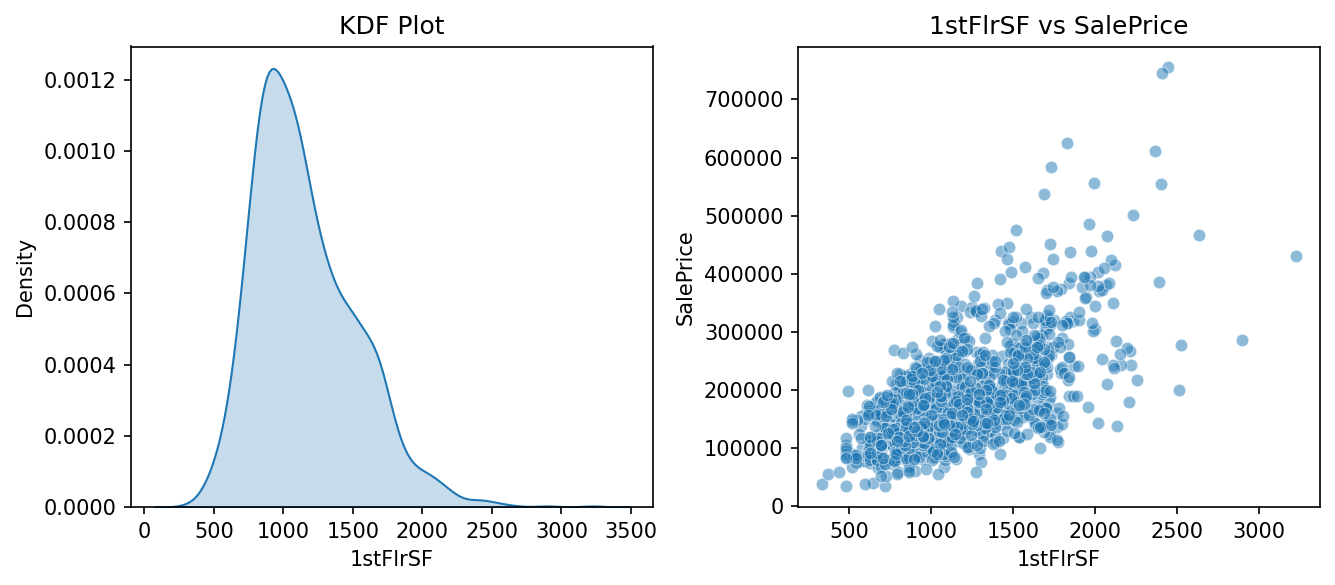

In [169]:
comparison_plot("1stFlrSF")

- this is also a linear relation

### FullBath

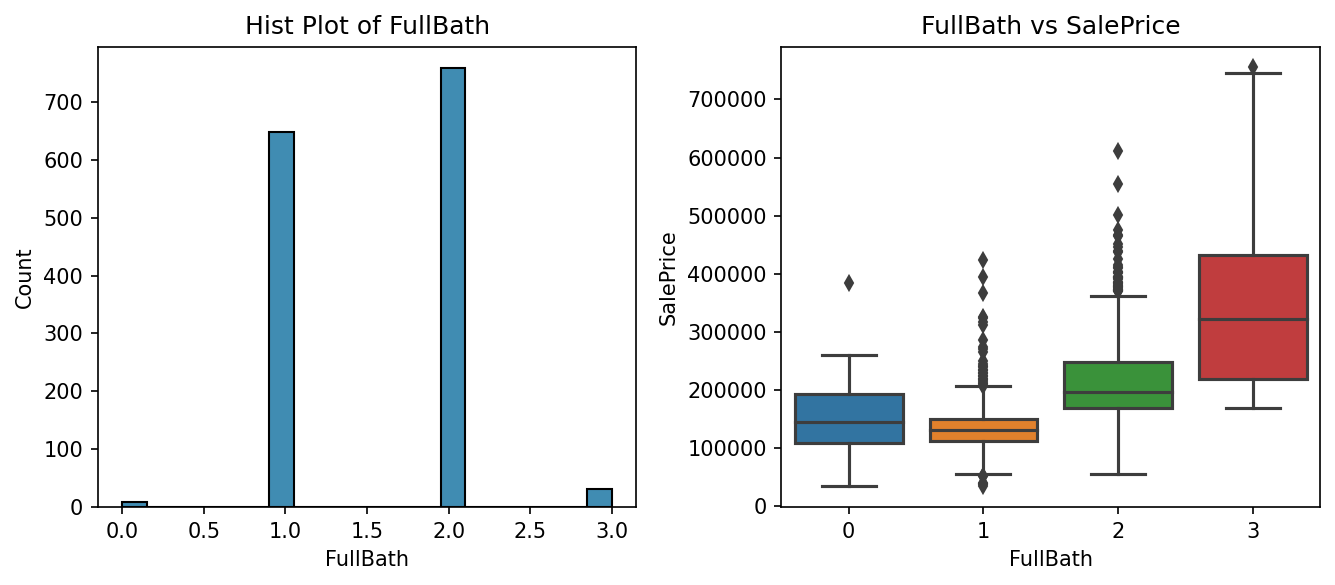

In [170]:
comparison_plot("FullBath", box=True)

- Most of the houses have 2 Bathrooms, which are much more than the no. of houses with 3 Bathrooms but still SalePrice of Houses with 3 Bathrooms is higher
- Houses with No Bathrooms have higher average SalePrice than those with 1 Bathrooms

### TotRmsAbvGrd

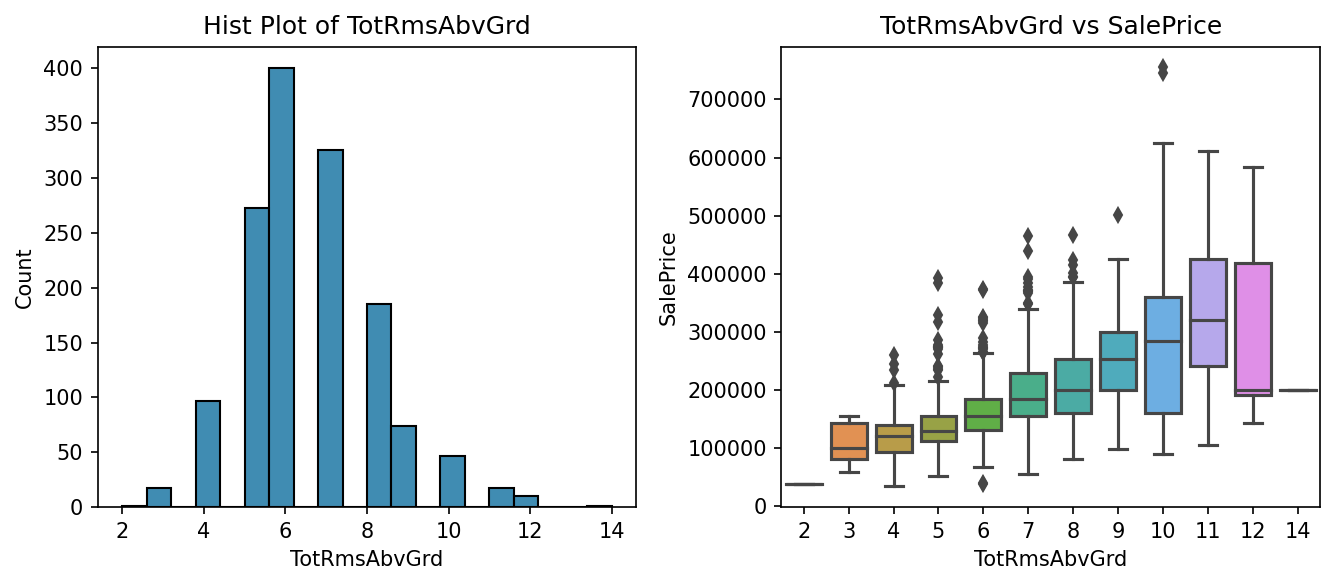

In [171]:
comparison_plot("TotRmsAbvGrd",box=True)

- Most of the houses have 6 Rooms above the ground
- As the Rooms above the ground increases, the SalePrice also increases, but after the Rooms above the ground reaches 11, the SalePrice starts to go down again, which is obvious because 11 Rooms above the ground is more than sufficient

- let's try to visualize few features that have negative correlation with SalePrice

### KitchenAbvGrnd

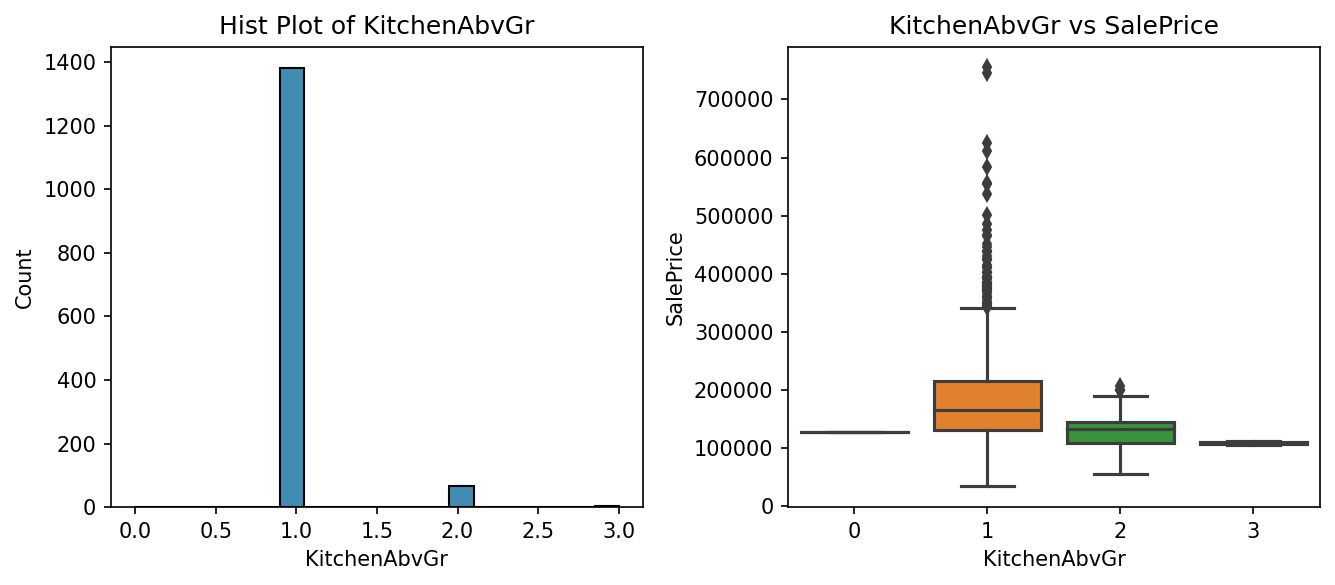

In [172]:
comparison_plot("KitchenAbvGr",box=True)

- from above we can see as the KitchenABvGr increases, SalePrice start to decreses
- Most demanding is KitchenAbvGr=1 and most of the houses have that also

### EnclosedPorch

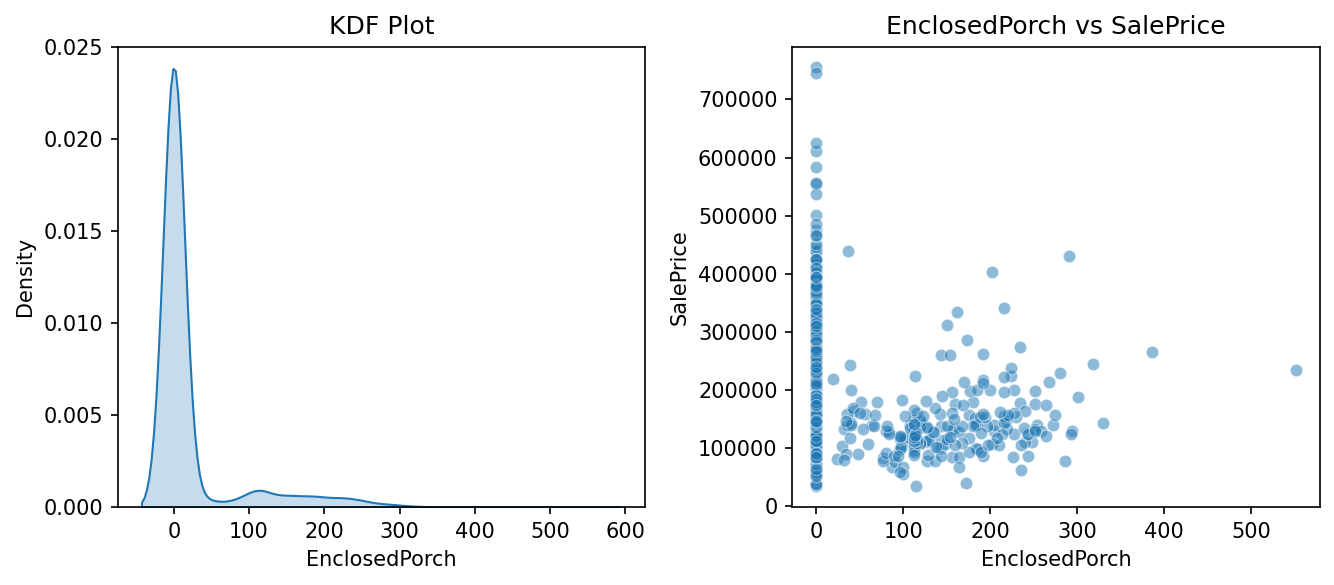

In [173]:
comparison_plot("EnclosedPorch")

- Most of the houses have no Enclosed Porch, and that is favourable also as it has a negative correlation with SalePrice

## Categorical Features

In [174]:
col = df_train.dtypes[df_train.dtypes == object].index
col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [175]:
for c in col:
    get_feature_description(c)
    print("##################################################################")

MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential Low Density Park 

       RM	Residential Medium Density

	

##################################################################
Street: Type of road access to property

       Grvl	Gravel	

       Pave	Paved

       	

##################################################################
Alley: Type of alley access to property

       Grvl	Gravel

       Pave	Paved

       NA 	No alley access

		

##################################################################
LotShape: General shape of property

       Reg	Regular	

       IR1	Slightly irregular

       IR2	Moderately Irregular

       IR3	Irregular

##################################################################
LandContour: Flatness of the property

       Lvl	Near 

- let's convert the ordinal variable to the numerical values

In [176]:
ord = ['LotShape','Utilities','ExterQual','ExterCond','LandSlope',
'Functional','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','HeatingQC','FireplaceQu','GarageFinish','GarageQual',
'GarageCond','PoolQC','CentralAir','Electrical','KitchenQual','Fence']

In [177]:
ordered_rel = {

    0:["None",'Unf','NA','N','Sal'],
    1:['IR1','ELO','Po','No','LwQ','Y','Mix','Sev','Gtl'],
    2:['IR2','NoSeWa','Fa','Mn','Rec','Mix','FuseP','Maj2','RFn','MnWw'],
    3:["IR3",'NoSewr','TA','Av','BLQ','FuseF','Maj1','Mod','GdWo'],
    4:['Gd','ALQ','FuseA','Mod','MnPrv'],
    5:["Reg",'AllPub','Ex','GLQ','SBrkr','Min2','Fin','GdPrv','Sev'],
    6:['Min1'],
    7:['Typ']
    
}

In [178]:
for col in ord:

    
    dic = {}
    for uni in df_train[col].unique():
        for i in range(len(ordered_rel.values())):
            if uni in list(map(list, (ele for ele in ordered_rel.values())))[i]:
                dic[uni] = i


    df_train[col] = df_train[col].map(dic)
    df_test[col] = df_test[col].map(dic)
    

- let's check their correlation with SalePrice

In [179]:
ind = df_train.corr()[ord].iloc[-1,:].sort_values(ascending=False).index
val = df_train.corr()[ord].iloc[-1,:].sort_values(ascending=False).values

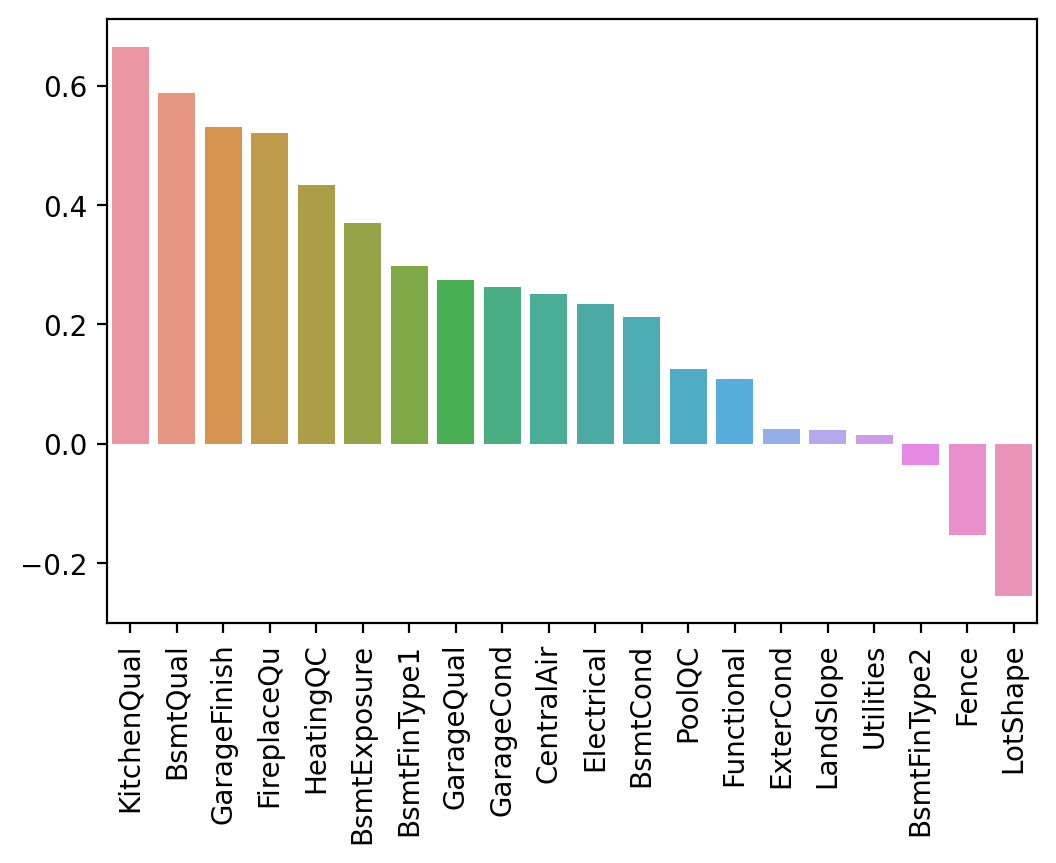

In [180]:
sns.barplot(x = ind[1:], y = val[1:])
plt.xticks(rotation=90);

- So this is the correlation between the categorical variables and SalePrice

### KitchenQual

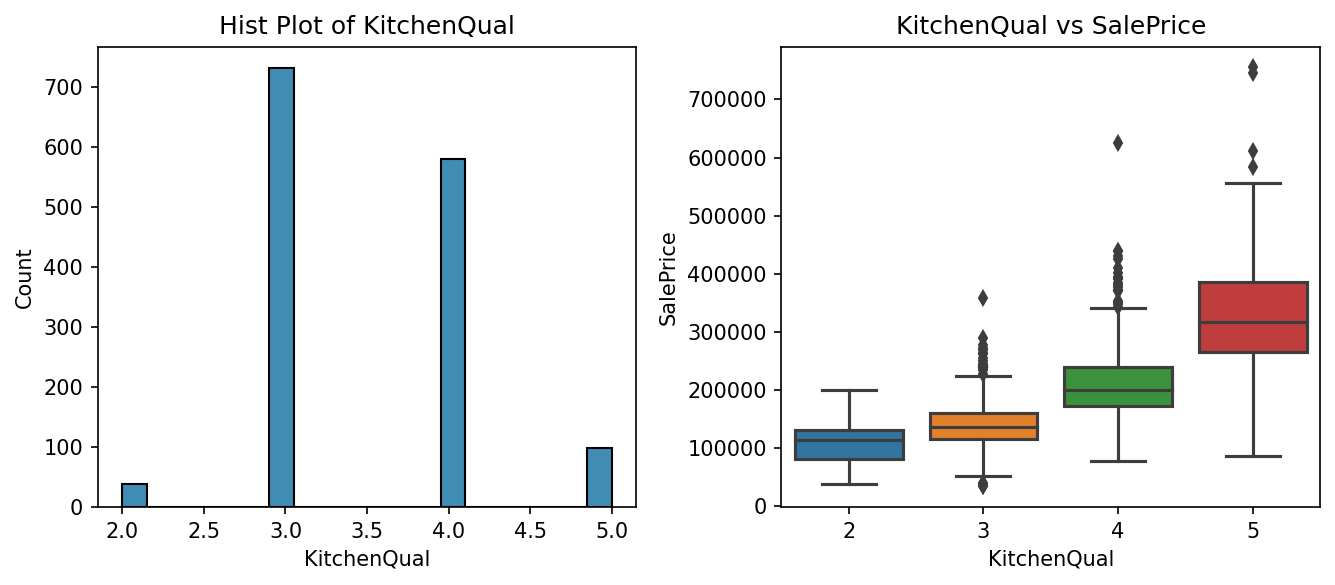

In [181]:
comparison_plot("KitchenQual",box=True)

- from above we can see that as the KitchenQual increases, the SalePrice also increases
- Most of the houses have KitchenQual=3, which is the best quality

### BsmtQual

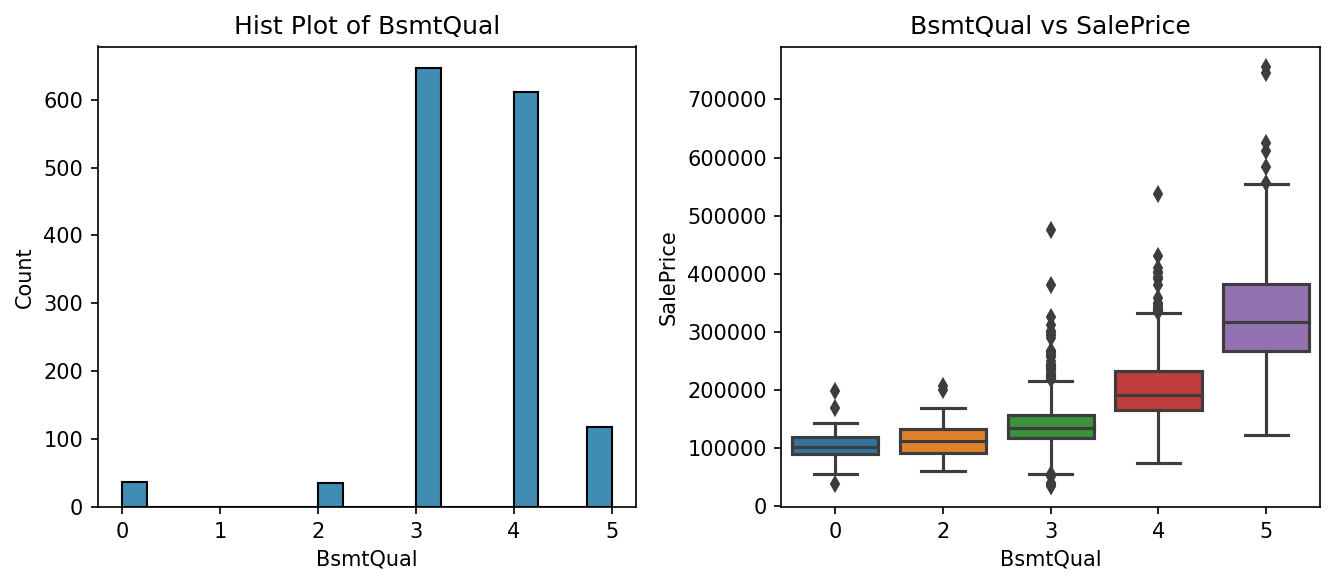

In [182]:
comparison_plot("BsmtQual",box=True)

- As the BsmtQual increases, the SalePrice also increases
- Most of the houses have BsmtQual=3 or 4

### GarageFinish

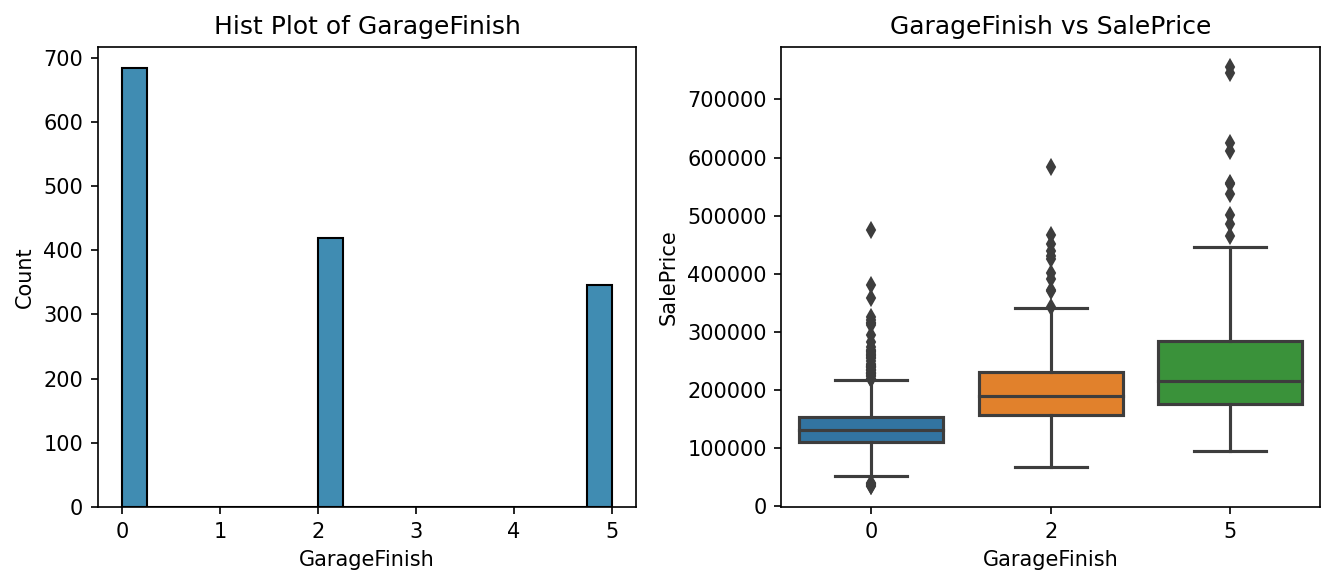

In [183]:
comparison_plot("GarageFinish",box=True)

- Most of the houses have GarageFinish=Unfinished or don't have Garage at all, and hence their Sale Price is also Low

### FirePlaceQu

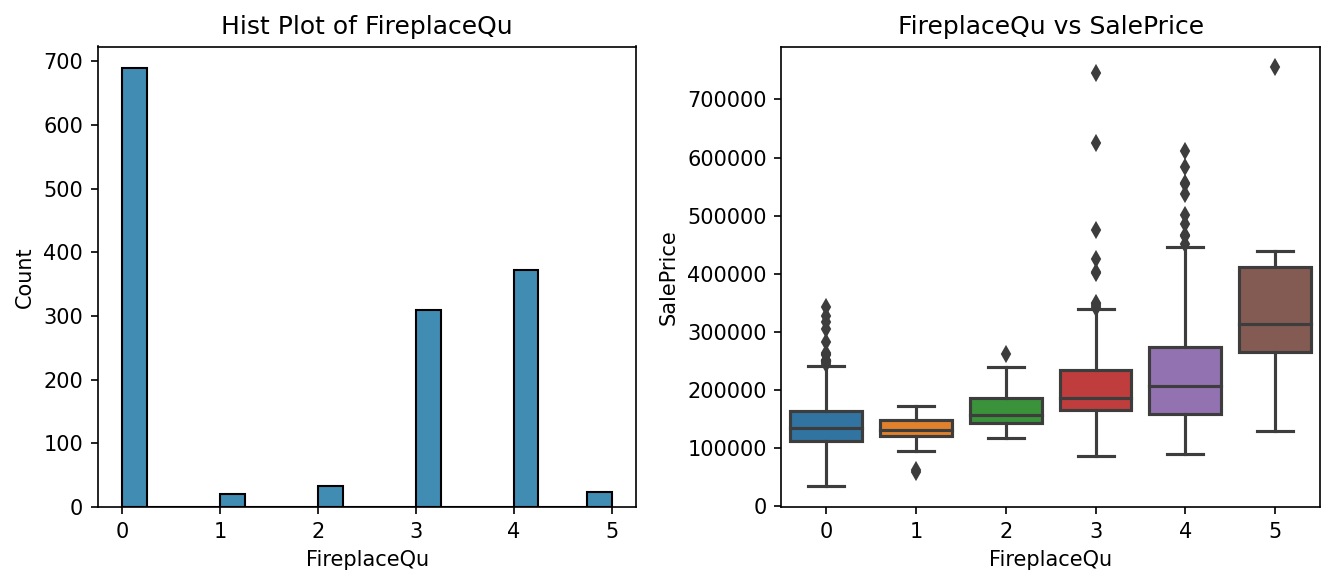

In [184]:
comparison_plot("FireplaceQu",box=True)

- As the Fireplace Quality increases Sale Price also Increases
- Most of the Houses don't have Fireplace

- it look like there are few outliners in case where FireplaceQu=3 , their Sale Price look like overpriced
- hence Remove them

In [185]:
ind  = df_train[ (df_train['FireplaceQu']==3) & ( df_train["SalePrice"]>500000) ].index

In [186]:
df_train.loc[ind]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1163,1170,60,RL,118.0,35760,Pave,None,1,Lvl,5,...,0,0,0,None,0,7,2006,WD,Normal,625000
1176,1183,60,RL,160.0,15623,Pave,None,1,Lvl,5,...,555,5,4,None,0,7,2007,WD,Abnorml,745000


In [187]:
df_train.drop(ind, axis=0,inplace=True)

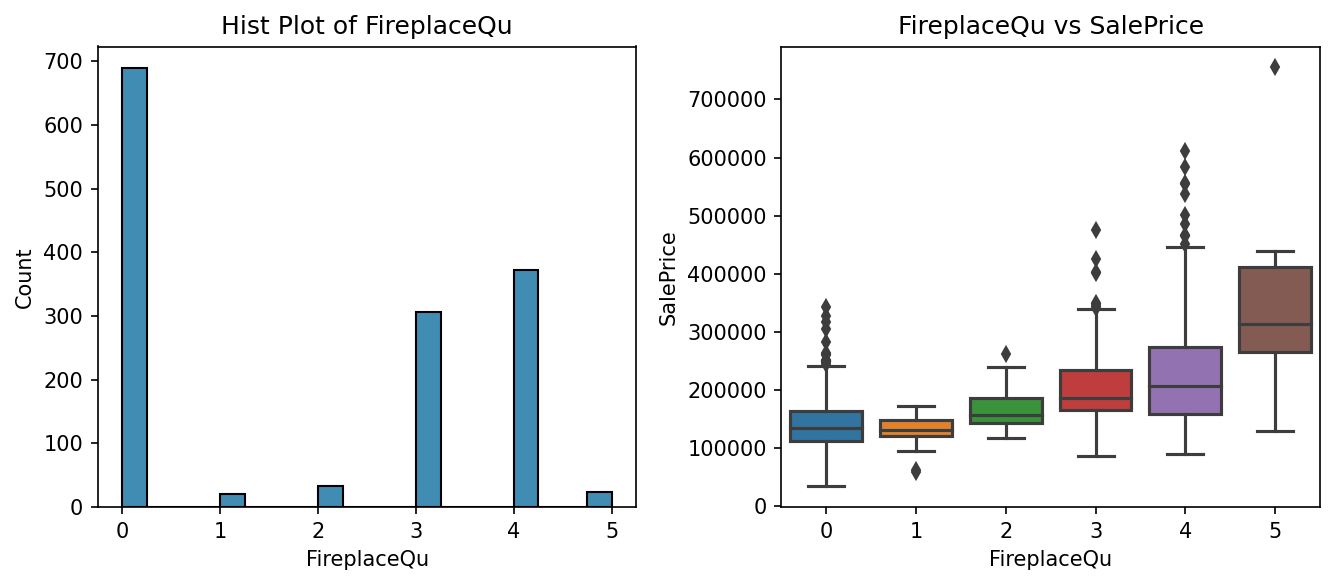

In [188]:
comparison_plot("FireplaceQu",box=True)

- let's try to visualize few features that have negative correlation with SalePrice

### LotShape

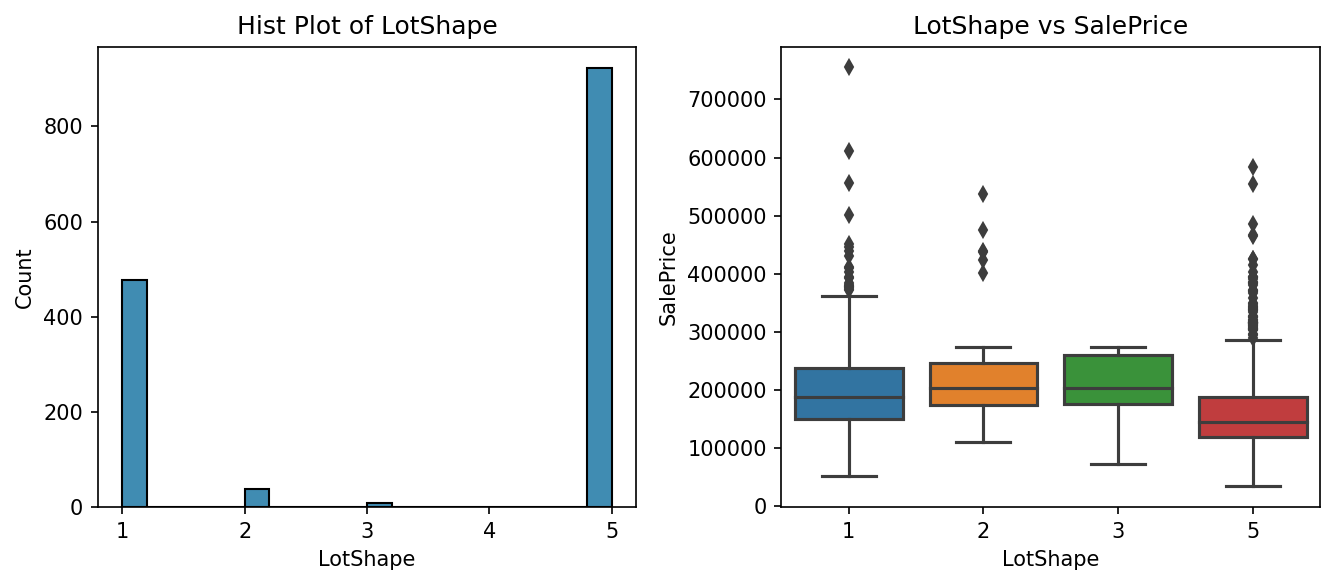

In [189]:
comparison_plot("LotShape",box=True)

- there is a sharp drop in SalePrice for LotShape = 5 i.e. Regular shape
- i.e people prefer Irregular shape of lot 

### Fence

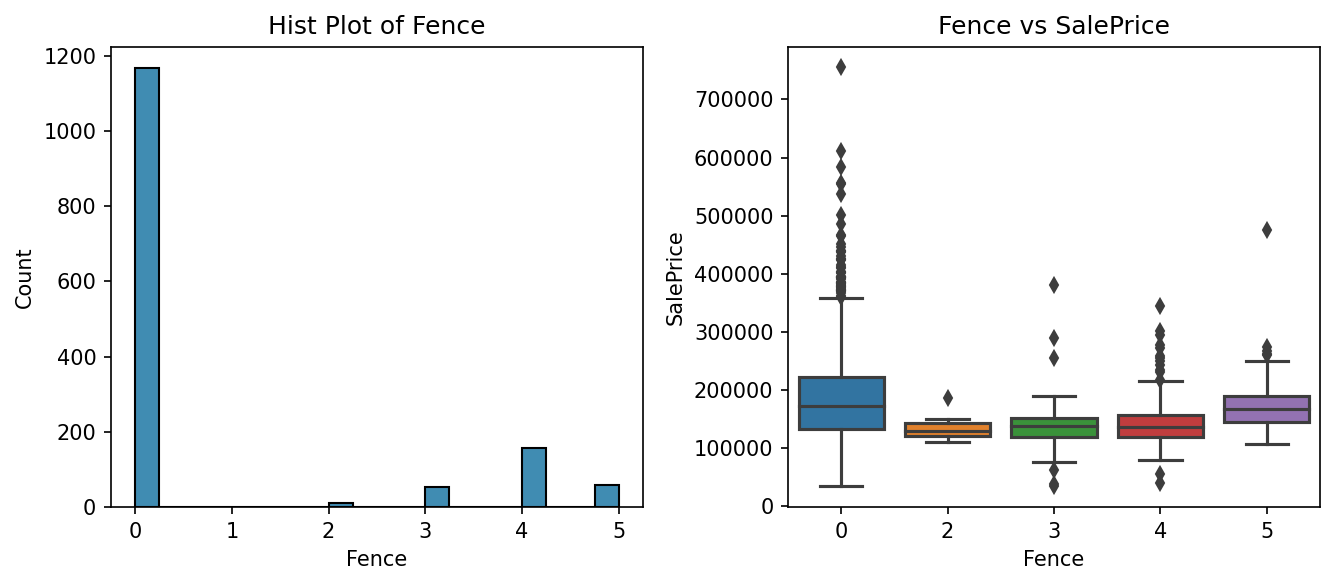

In [190]:
comparison_plot("Fence",box=True)

- Most of the houses don't have a FEnce at all

## Saving the data

In [191]:
df_train.to_csv("data/for_preprocessing_train.csv",index=False)
df_test.to_csv("data/for_preprocessing_test.csv",index=False)